# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

**Загружаем библиотеки pandas и matplotlib.pyplot**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Откроем файл**

In [2]:
#прогрузил, но даннные необходимо прочитать с разделителем \t
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
pd.set_option('display.max_columns', None)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
#Посмотрим количество пропущенных в столбцах
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

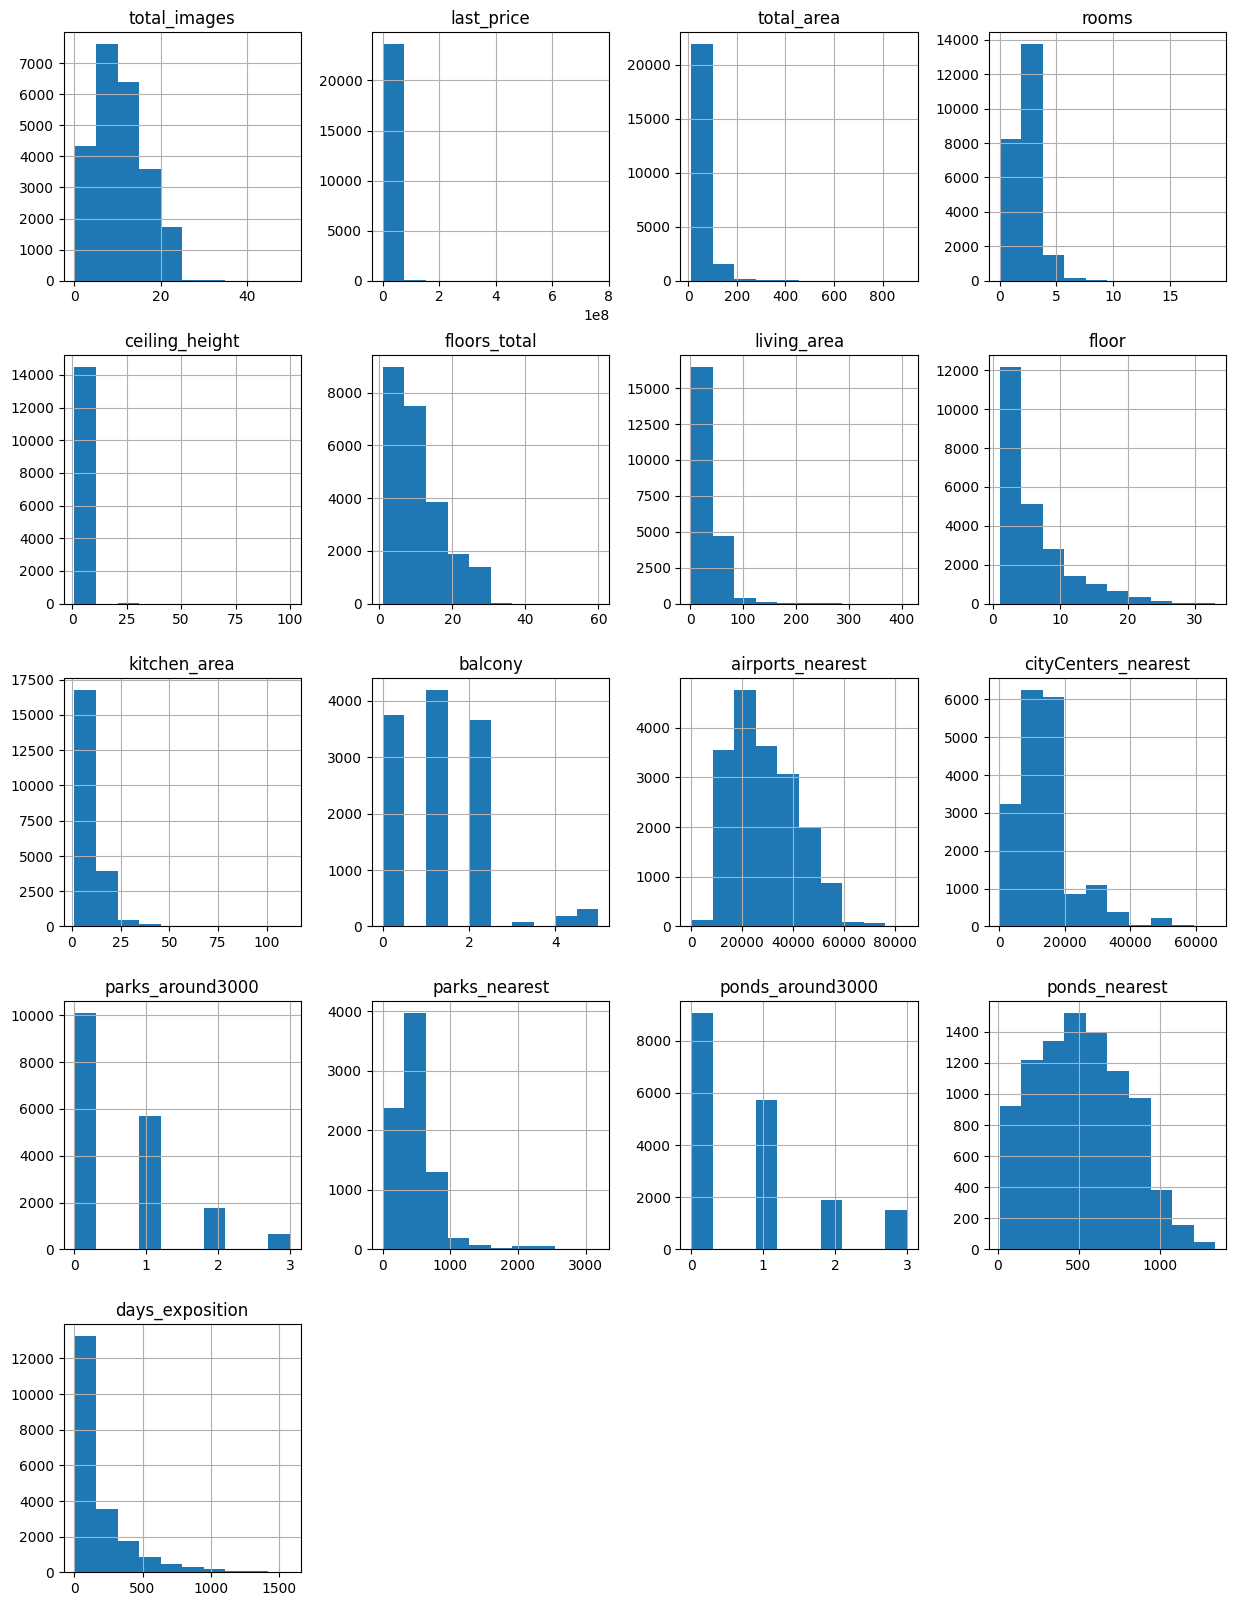

In [6]:
#Построим гистаграммы
data.hist(figsize=(15, 20));

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Графики построено верно! 
</div>

**По общей информации мы видим много пропущенных значений в столбцах и явные выбросы аномальных значений в некоторых столбцах. 
Первоначальный объем предобработки ланных следующий:**  
total_images         - **Проверить уникальные значения на выбросы**     
last_price           - **Поменять тип на int. Проверить уникальные значения**    
total_area           - **Проверить уникальные значения. Округлить до 1 значения после запятой.**        
first_day_exposition - **Поменять на временной формат %Y-%m-%d,т.к в часах и минутах везде нули**     
rooms                - **Проверить уникальные значения**     
ceiling_height       - **Заполнить пропущенные значения. Проверить уникальные значения.**       
floors_total         - **Поменять тип на int. Проверить уникальные значенияю. Заполнить пропуски**   
living_area          - **Заполнить пропущенные значения. Проверить уникальные значения. Округлить до 1 значения после запятой.**        
floor                - **Проверить уникальные значения**      
is_apartment         - **Заполнить пропущенные значения. Проверить значения. Поменять тип данных, т.к.по условию это должен быть bool**     
studio               - **ok**    
open_plan            - **ok**    
kitchen_area         - **Заполнить пропущенные значения. Проверить уникальные значения. Округлить до 1 значения после запятой.**       
balcony              - **Заполнить пропущенные значения. Поменять тип на int**    
locality_name        - **Заполнить пропущенные значения. Проверить уникальные значения**     
airports_nearest     - **Заполнить пропущенные значения.**    
cityCenters_nearest  - **Поменять название столбца на city_сenters_nearest. Заполнить пропущенные значения**      
parks_around3000     - **Заполнить пропущенные значения. Поменять тип на int**    
parks_nearest        - **Заполнить пропущенные значения**    
ponds_around3000     - **Заполнить пропущенные значения. Поменять тип на int**    
ponds_nearest        - **Заполнить пропущенные значения.**    
days_exposition      - **Заполнить пропущенные значения.**  


### Выполните предобработку данных

#### total_images - Проверить уникальные значения**


In [7]:
#sorted(data['total_images'].unique())

#### last_price - Поменять тип на int. Проверить уникальные значения

Значения после запятой это копейки - очень малая величина в области недвидимости, которая никак не повлияет на анализ данных. Поэтому меняем на int.

In [8]:
data['last_price'] = data['last_price'].astype('int') 
#data.info()
#sorted(data['last_price'], reverse=True)
#sorted(data['last_price'])

#### total_area - Проверить уникальные значения на выбросы. Округлить до 1 значения после запятой

In [9]:
#data['total_area'].describe()
#sorted(data['total_area'], reverse=True)
#sorted(data['total_area'])
data['total_area'] = data['total_area'].round(1)
#data.query('total_area == 900.0')
#data.query('total_area == 12.0')

#### first_day_exposition - Поменять на временной формат %Y-%m-%d,т.к в часах и минутах везде нули

In [10]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
#data.head()

#### rooms - Проверить уникальные значения

In [11]:
#sorted(data['rooms'], reverse=True)
#sorted(data['rooms'])
#data.query('rooms == 19')
#data.query('rooms == 0')

Смущает некое количество значений 0. Скорее всего это студии. Проверим данные по количесиву комнат в студиях и в квартирах свободной планировки

In [12]:
#data.pivot_table(index='rooms', values=['studio', 'open_plan'], aggfunc='sum')

Обратил внимание, что имеется 11 однокомнатных студий. Скорее всего ошибка при вводе данных. Заменим на 0

In [13]:
data.loc[data['studio'] == True, 'rooms'] = 0
#Проверим
#data.pivot_table(index='rooms', values=['studio', 'open_plan'], aggfunc='sum')

#### ceiling_height - Заполнить пропущенные значения медианой. Проверить уникальные значения

In [14]:
#data['ceiling_height'].describe()
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен с таким решением для столбца с высотой потолков, так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

In [15]:
#sorted(data['ceiling_height'].unique(), reverse=True)

Если учесть, что стандартная высота потолков от 2.2 до 3.5, можно предположить, что в значениях от 22.6 до 32 включительно была неверно посталена точка для разделения целых и десятичных значений. Исправим это, разделив данные значения на 10:

In [16]:
data.loc[((data['ceiling_height'] >= 22.6) & (data['ceiling_height'] <= 32.0)), 'ceiling_height'] = data['ceiling_height']*0.1
#sorted(data['ceiling_height'].unique(), reverse=True)

Появились длинные значения. Округлим до 1 значений после запятой

In [17]:
data['ceiling_height'] = data['ceiling_height'].round(1)
#sorted(data['ceiling_height'].unique(), reverse=True)

In [18]:
len(data.query('ceiling_height < 2.2 or ceiling_height == 100'))

15

Подправили часть данных. Но всё равно остались аномальные значения (<2.2 и 100). Их всего 15. Необходимо показать их коллегам, чтобы избежать подобного в будущем. А сами будем держать их в уме при дальнейшем анализе.

#### floors_total - Поменять тип на int. Проверить уникальные значенияю. Заполнить пропуски

In [19]:
#sorted(data['floors_total'].unique(), reverse=True)

Отсутствует 86 значений. Можно заполнить медианой, но тогда может оказаться, что квартира будет находиться на этаже выше, чем суммарное количество этажей в доме. Проверим сколько получится таких значений.

In [20]:
len(data[((data['floors_total'].isna()) & (data['floor'] > data['floors_total'].median()))])

37

Поэтому лучше заполнить просто значением этажа, на котором находится квартира. 

In [21]:
for i in data['floor']:
    data.loc[((data['floors_total'].isna()) & (data['floor'] == i)), 'floors_total'] = i

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Хороший способ)
</div>

In [22]:
#data.info()
#sorted(data['floors_total'].unique(), reverse=True)

Теперь переведем в формат int, т.к. количество этажей не может быть с дробным значением

In [23]:
data['floors_total'] = data['floors_total'].astype('int')
#data.info()

#### living_area - Заполнить пропущенные значения. Проверить уникальные значения. Округлить до 1 значения после запятой.

In [24]:
#sorted(data['living_area'].unique(), reverse=True)
#sorted(data['living_area'].unique())

In [25]:
data['living_area'].isna().sum()

1903

Как вариант, можно воспользоваться медианой для пропущенных значений. Но у нас имеется столбец total_area без пропусков. Для большей точности данных, мы можем вычислить среднее отношение жилой площади к общей площади, а затем применить его для вычисления жилой площади с пропущенными значениями.

In [26]:
living_percent = data['living_area'].mean() / data['total_area'].mean()

In [27]:
data['living_area'] = data['living_area'].fillna(data['total_area']*living_percent)
data['living_area'] = data['living_area'].round(1)
#data.info()
#sorted(data['living_area'].unique(), reverse=True)
#sorted(data['living_area'].unique())
                                                

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Прекрасный способ для замены! 👏🏻👏🏻👏🏻
</div>

#### floor - Проверить уникальные значения

In [28]:
#sorted(data['floor'].unique(), reverse=True)

#### is_apartment - Заполнить пропущенные значения. Проверить значения. Поменять тип данных, т.к.по условию это должен быть bool

In [29]:
data['is_apartment'].isna().sum()

20924

Насколько мне известно, апартаменты достаточно редкий тип недвижимости. Сгруппируем данные и посмотрим на cоотношение.

In [30]:
apart_grouped = data.pivot_table(index='is_apartment', values='rooms', aggfunc='count')
apart_grouped.columns = ['number']
apart_grouped

,number
is_apartment,
False,2725
True,50


Как видим, апартаментов действительно мало среди заполненных значений. Я предположу, что все апартаменты обозначены, поэтому заполню пропущенные значения параметром False

In [31]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)
#data.info()

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

Тип столбца поменялся на bool

#### kitchen_area - Заполнить пропущенные значения. Проверить уникальные значения. Округлить до 1 значения после запятой.

In [32]:
#sorted(data['kitchen_area'].unique(), reverse=True)
#sorted(data['kitchen_area'].unique())
data['kitchen_area'].isna().sum()

2278

Поступим по тому же принципу, как и с living_area:

In [33]:
kitchen_percent = data['kitchen_area'].mean() / data['total_area'].mean()

In [34]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']*kitchen_percent)
data['kitchen_area'] = data['kitchen_area'].round(1)
#data.info()

#### balcony - Заполнить пропущенные значения. Поменять тип на int

Там, где пропущены значения, скорее всего балконы просто отсутствуют. Заменим пропуски на нулевые значения

In [35]:
data['balcony'] = data['balcony'].fillna(value=0)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

Значение количества балконов не может быть дробным. Поменяем тип данных на int

In [36]:
data['balcony'] = data['balcony'].astype('int')
#data.info()

#### locality_name - Заполнить пропущенные значения. Проверить уникальные значения

In [37]:
#data['locality_name'].unique()

Очень большой беспорядок в данных. Заменим ё на е и удалим описание населенных пунктов,оставив только названия.

In [38]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской ', 'поселок ', 'деревня ', 'городского типа ', 'садовое товарищество ', 'село ', 'садоводческое некоммерческое товарищество ', 'при железнодорожной ', 'станции ', 'коттеджный ', 'Пансионат '], '', regex=True)
) 

Также поменяем все буквы на строчные

In [39]:
data['locality_name'] = data['locality_name'].str.lower()
#data['locality_name'].unique()

In [40]:
data['locality_name'].isna().sum()

49

Имеем 49 пропущенных значений. Присвоим им значение other

In [41]:
data['locality_name'] = data['locality_name'].fillna('other')
#data.info()

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

#### airports_nearest - Заполнить пропущенные значения.

In [42]:
#data[data['airports_nearest'].isna()].head(50)

Судя по данным, значение пропущено у объектов, находящихся за городом. Поэтому оставим пропуски как есть.

#### cityCenters_nearest  - Поменять название столбца на city_сenters_nearest. Заполнить пропущенные значения

In [43]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})
#data.info()

In [44]:
#data[data['city_centers_nearest'].isna()].head(50)

Ситуация, аналогичная аэропорту. Пропуск в строке объектов, находящихся за городом. Пропуски оставляем.

#### parks_around3000 - Заполнить пропущенные значения. Поменять тип на int

In [45]:
#data[data['parks_around3000'].isna()].head(50)

Полагаю, что пропуски в местах, где парки отсутствуют. Поэтому заменим пропущенные значения нулями. И изменим тип данных столбца на int, т.к. значение количества парков не может быть дробным.

In [46]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
data['parks_around3000'] = data['parks_around3000'].astype('int')
#data.info()

#### parks_nearest - Заполнить пропущенные значения

In [47]:
#data[data['parks_nearest'].isna()].head(50)

Как мы видим значение отсутствует при нулевом значении в столбце parks_around3000. Поэтому пропуски оставляем.

#### ponds_around3000 - Заполнить пропущенные значения. Поменять тип на int

In [48]:
#data[data['ponds_around3000'].isna()].head(50)

Скорее всего картина, аналогичная паркам. Пропуски в строках, объектов, где парков рядом нет. Заменим пропущенные значения нулями. И изменим тип данных столбца на int, т.к. значение количества прудов не может быть дробным.

In [49]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
#data.info()

#### ponds_nearest - Заполнить пропущенные значения.

In [50]:
#data[data['ponds_nearest'].isna()].head(50)

Также как и с парками, пропуски стоят напротив нулевых значений столбца ponds_around3000. Соответственно пропущенные значения оставлем.

#### days_exposition - Заполнить пропущенные значения

In [51]:
#data.head(50)

По осмотру столбца можно сделать вывод, что пропущенные показывают, что объект не продан, соответственно и объявление не закрыто в связи с этим. В таком слцчае пропущенные значения оставляем нетронутыми. В идеале у данного столбца должны быть целочисленные значения, но из-за наличия пропусков, поменять тип не можем.

#### Вывод

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [53]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,False,False,False,11.0,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.6,14,90.8,9,False,False,False,27.8,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


Мы осуществили предобработку данных. В процессе в данных произошли следующие изменения:
* Во всех столбцах проверены уникальные значения;
* В столбце last_price поменяли тип данных на int;
* В столбце total_area округлили значения до десятичных;
* Cтолбец first_day_exposition был изменен на временной тип данных;
* В ceiling_height заполнили пропуски медианным значением,выявили аномальные значения, часть аномальных значений исправили, перенеся запятую;
* В столбце floors_total заполнили пропуски значениями этажей, на которых находится объект;
* living_area - заполнили пропуски, посчитав и испольуя средне-процентное отношение жилой площади к общей площади. Округлили значения до десятичных;
* is_apartment - заполнили пропуски значениями False;
* Изменили название столбца cityCenters_nearest;
* kitchen_area - заполнили пропуски, посчитав и испольуя средне-процентное отношение кухонной площади к общей площади. Округлили значения до десятичных;
* balcony - Заполнили пропуски нулевыми значениями и поменяли тип данных на int;
* locality_name - пропуски были заполнены значением other. Имеющиеся данные были отредактированы;
* Пропуски в столбцах parks_around3000, ponds_around3000 были заполнены нулевыми значениями. Тип данных изменен на int.

Предполагаю, что пропуски могли появиться в связи с некорректно предоставленной информацией собственником объекта для продажи, а также небрежность или опечатки.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Отличная работа!
</div>

### Добавьте в таблицу новые столбцы

#### цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой)

In [54]:
data['meter_price'] = data['last_price'] / data['total_area']
data['meter_price'] = data['meter_price'].round(2)
#data.head()

#### день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [55]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
#data.head()

#### месяц публикации объявления

In [56]:
data['month_exposition'] = data['first_day_exposition'].dt.month
#data.head()

#### год публикации объявления

In [57]:
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,False,False,False,11.0,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.6,14,90.8,9,False,False,False,27.8,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018


#### тип этажа квартиры (значения — «‎первый», «последний», «другой»)

Нам необходимо сделать категоризацию значений. Для этого создадим функцию и применим её на столбец floor по принципу:
Если этаж 1 - он будет везде первым;
Если этаж равен количесиву этажей в доме, значит он последний;
Остальные будут другими

Т.к мы оперируем данными с нескольких столбцов, нужно воспользоваться аргументом row и параметром axis

In [58]:
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_category'] = data.apply(categorize_floor, axis=1)
#data.head(50)

#### расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

Для перевода метров в километры необходимо ззачения поделить на 1000

In [59]:
data['km_till_center'] = data['city_centers_nearest'] / 1000
data['km_till_center'] = data['km_till_center'].round(0)
#data.head(50)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведите исследовательский анализ данных

#### Постороим графики для анализа данных

**Общая площадь**

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [61]:
data['total_area'].describe()

count    23699.000000
mean        60.348635
std         35.654086
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Сначала построим гистограмму по всем значениям

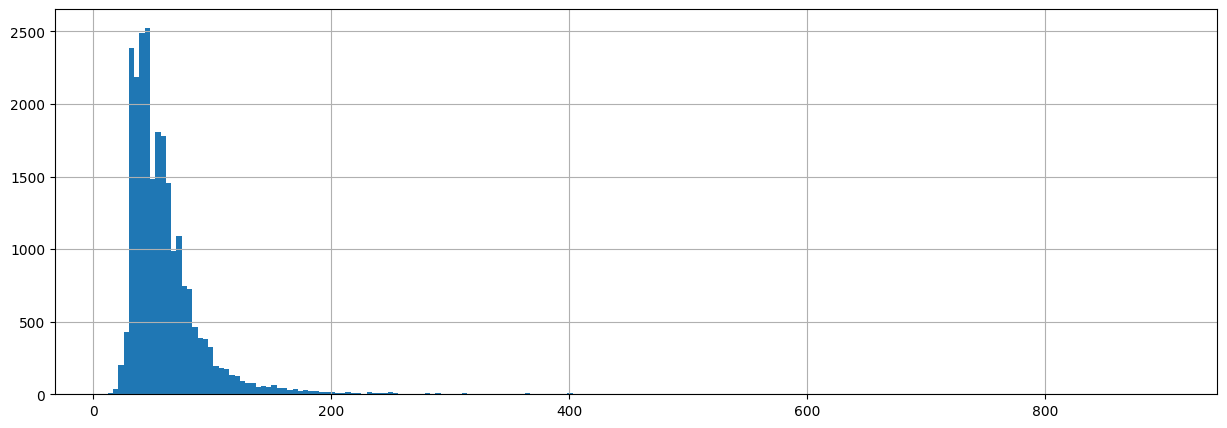

In [62]:
data['total_area'].hist(bins=200, range=(12,900), figsize=(15, 5));

Самая популярная категория продаваемых объектов - до 150 м2. Далее наиболее редкие до максильного значения 900.
Посторим гистограмма в пределах 150 м2

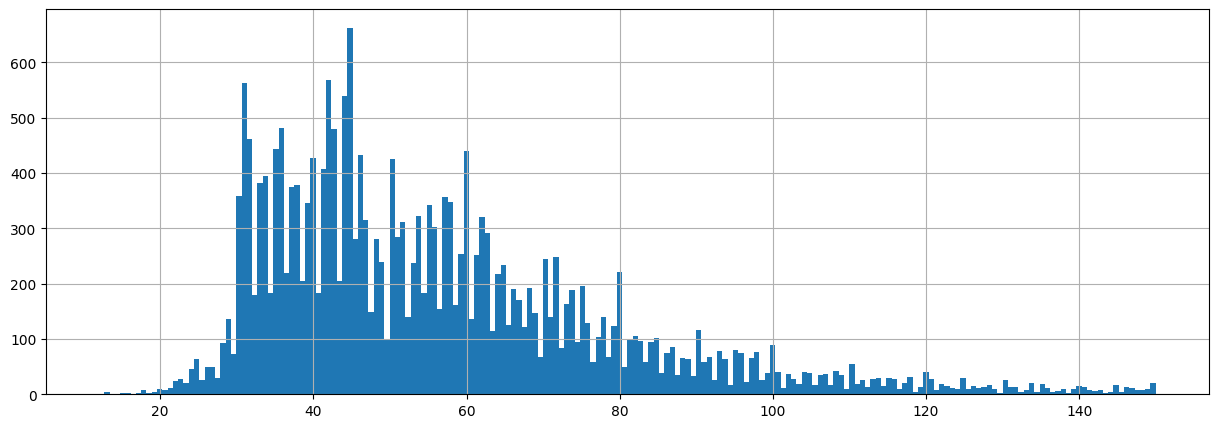

In [63]:
data['total_area'].hist(bins=200, range=(12,150), figsize=(15, 5));

Здесь мы видим, что больше всего на рынке квартир с площадью от 30 м2 до 60 м2. А самый частый вариант объявлений в районе 45 м2.

**Жилая площадь**

In [64]:
data['living_area'].describe()

count    23699.000000
mean        34.594139
std         22.354622
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

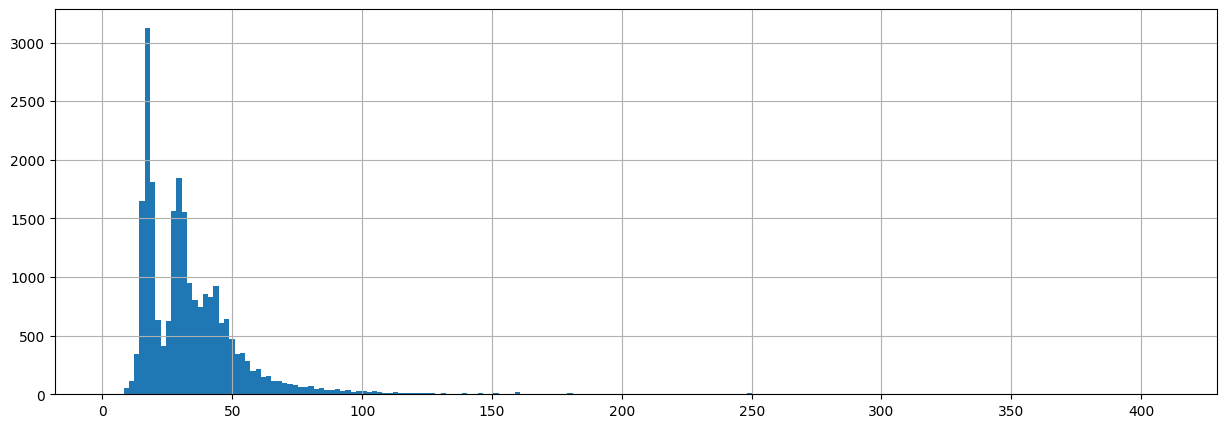

In [65]:
data['living_area'].hist(bins=200, range=(2,409), figsize=(15, 5));

Картина аналогичная - наибольшее количество у значений до 100 км2. Посторим гистограмму в пределах этого значения.

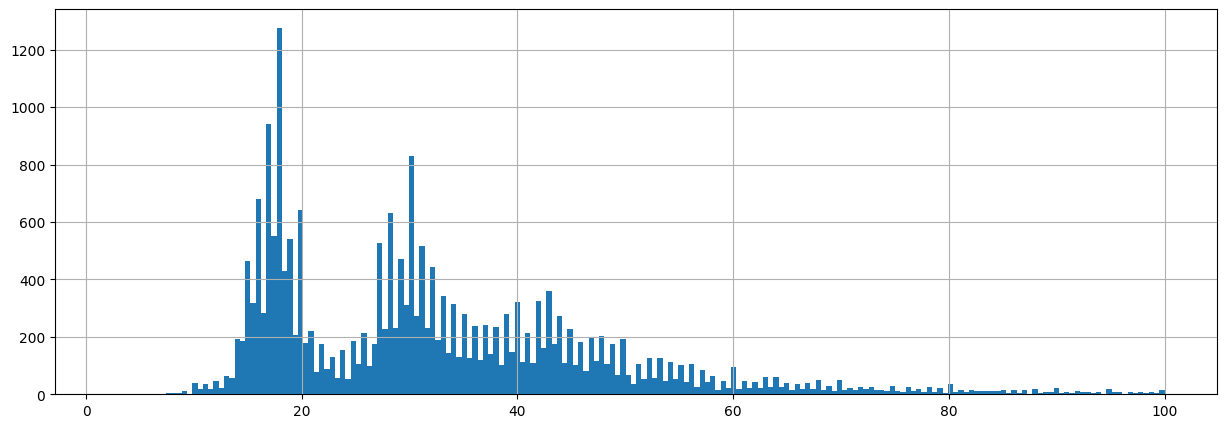

In [66]:
data['living_area'].hist(bins=200, range=(2,100), figsize=(15, 5));

Наибольшее количество объявлений квартир с жилой площадью 15-20 м2 и 28-32 м2. Самое частое значение жилой площади в объявлениях в районе 16 м2.

**Площадь кухни**

In [67]:
data['kitchen_area'].describe()

count    23699.000000
mean        10.506464
std          6.039870
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

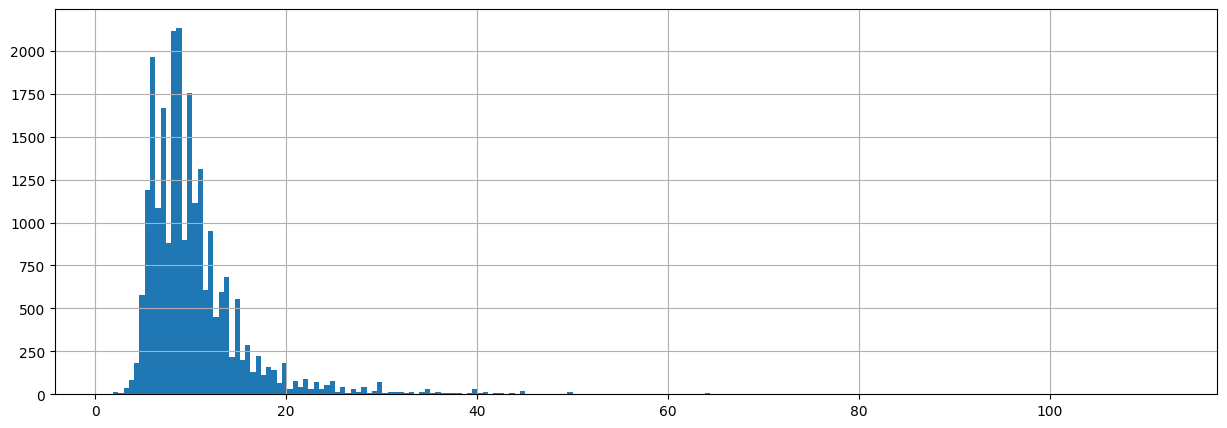

In [68]:
data['kitchen_area'].hist(bins=200, range=(1.3,112), figsize=(15, 5));

Применим range в пределах 15

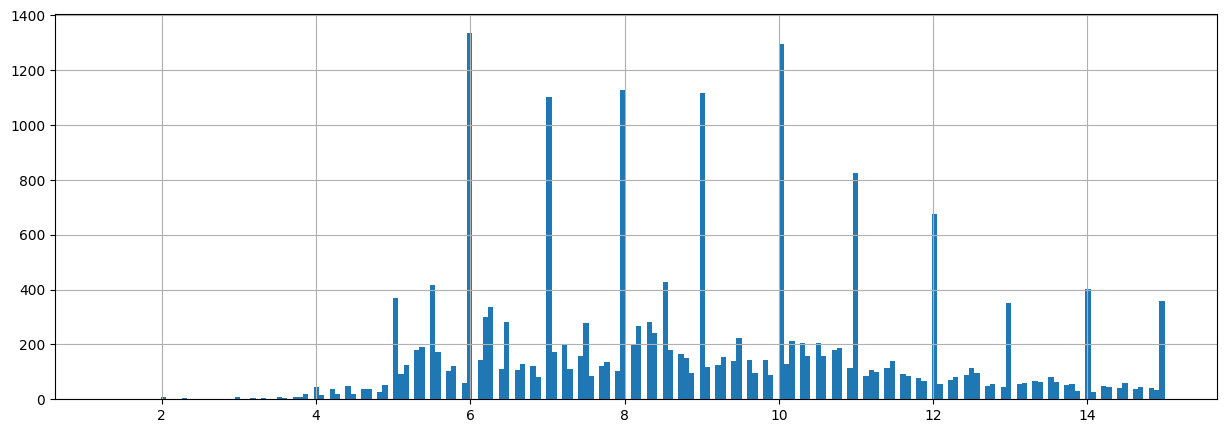

In [69]:
data['kitchen_area'].hist(bins=200, range=(1.3,15), figsize=(15, 5));

Видно, что на рынке больше объектов с кухонной площадью 6-10 м2 и именно по целым числам. Видимо большинство пользователей заполняли данные, не испульзуя десятичные значения

**Цена объекта**

In [70]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

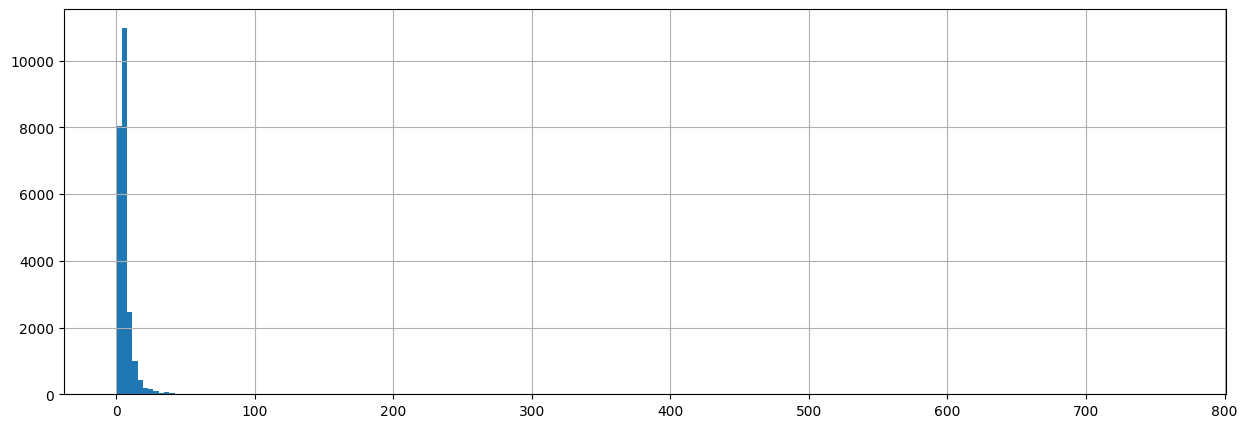

In [71]:
# Разделим значения data['last_price'] на 1000000 для более понятного отображения на графиках.
(data['last_price']/1000000).hist(bins=200, range=(0,763), figsize=(15, 5));

In [72]:
#sorted(data['last_price'].unique(), reverse=True)

Имеется ряд единичных значений от 10 миллионов до максимального 763 миллионов. Из-за этого плохо видна динамика на гистограмме среди самых популярных значений. Отрежем чересчур большие значения, сократив предел до 10 миллионов.

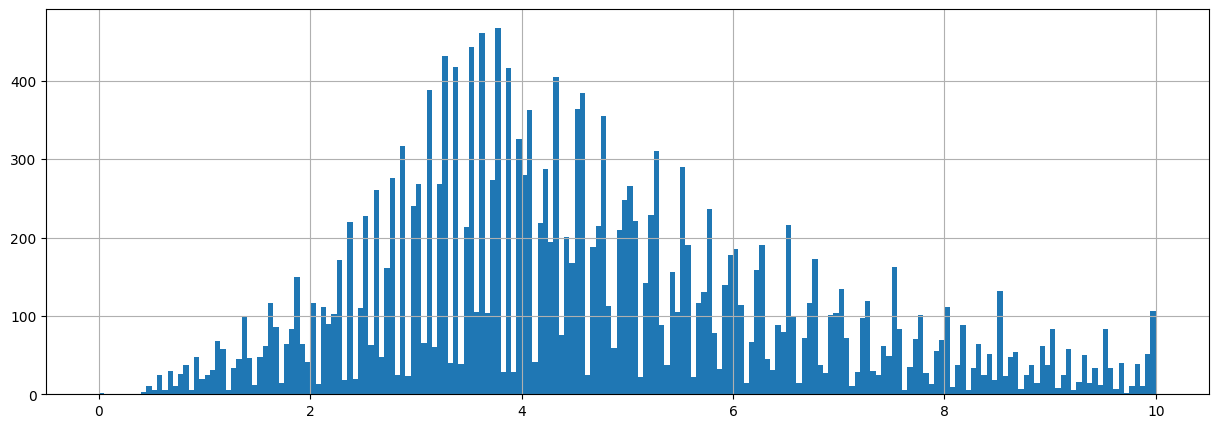

In [73]:
(data['last_price']/1000000).hist(bins=200, range=(0,10), figsize=(15, 5));

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут можно разделить все значения в столбце last_price на 1 млн, чтобы они пришли в более понятный вид)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Спасибо за хороший совет. Применил его выше в задании.
</div>

Теперь видно, что самая распространенная стоимость квартир находится в районе 4 миллионов 

**Количество комнат**

In [74]:
data['rooms'].describe()

count    23699.000000
mean         2.070172
std          1.079081
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

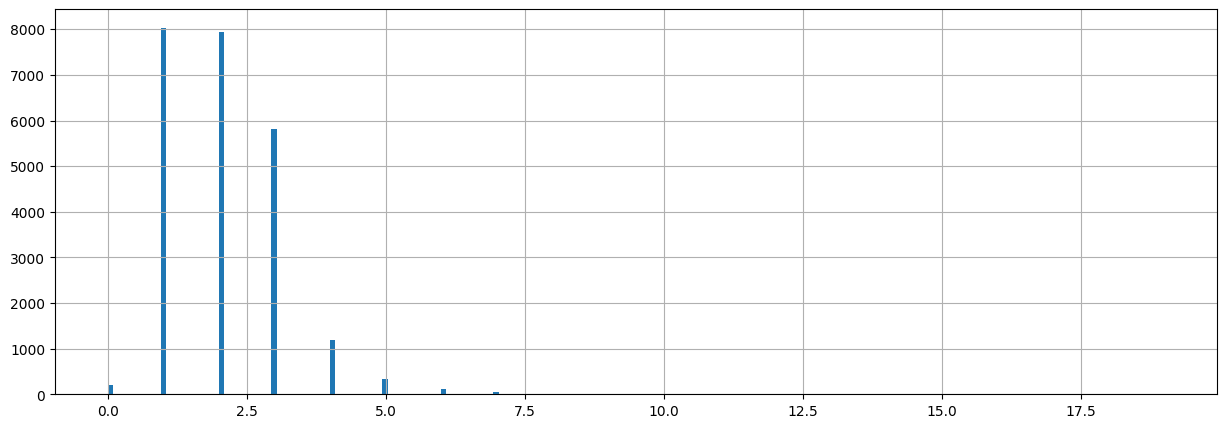

In [75]:
data['rooms'].hist(bins=200, range=(0,19), figsize=(15, 5));

Сократим предел до 7

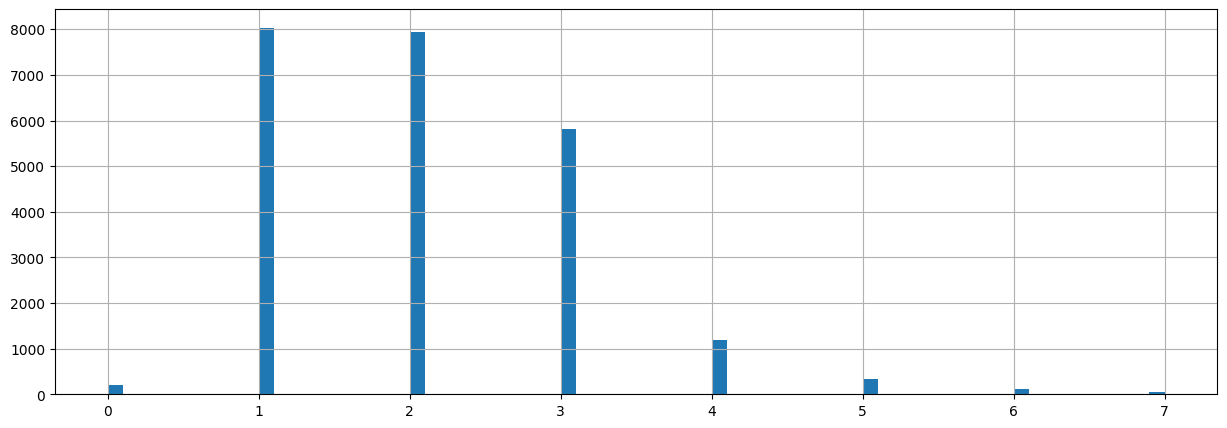

In [76]:
data['rooms'].hist(bins=70, range=(0,7), figsize=(15, 5));

Самыми ходовыми являются однокомнатные квартиры. Видно как количество объявлений снижается с уменьшением количества комнат

**Высота потолков**

In [77]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.686464
std          0.690592
min          1.000000
25%          2.600000
50%          2.600000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

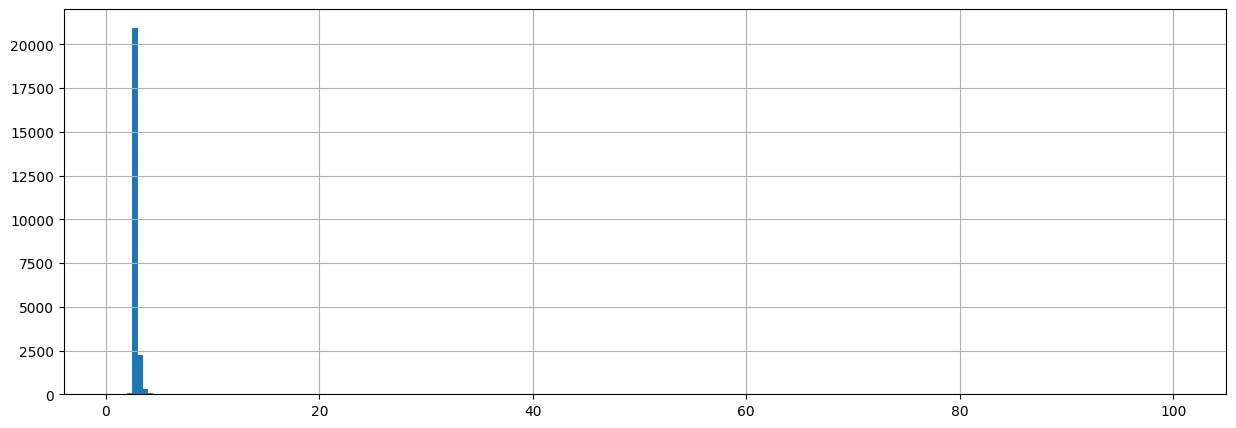

In [78]:
data['ceiling_height'].hist(bins=200, range=(1,100), figsize=(15, 5));

In [79]:
#sorted(data['ceiling_height'].unique(), reverse=True)

Еще в процессе преобработки данных я обратил внимание на явно аномальные значения, чтобы показать их коллегам. Гугл говорит нам, что стандартная высота потолка жилого помещения - от 2.2 до 3.5 м.
Попробую установить range от 1 до 6 метров, а коллег попросим найти решение, чтобы в будущем избежать появления подобных аномалий.

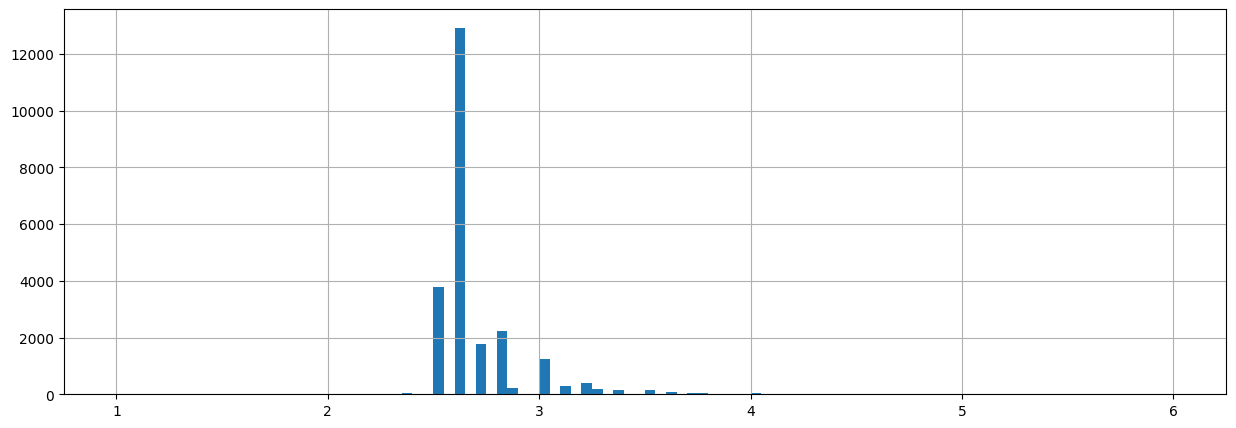

In [80]:
data['ceiling_height'].hist(bins=100, range=(1,6), figsize=(15, 5));

Что и требовалось доказать. Самые частые показатели в промежутке 2.5-3 метров. Самый популярный показатель - 2.6. Затем количество объявлений снижается до 3.5, а дальше значения становятся единичными и аномальными.

**Тип этажа квартиры («первый», «последний», «другой»)**

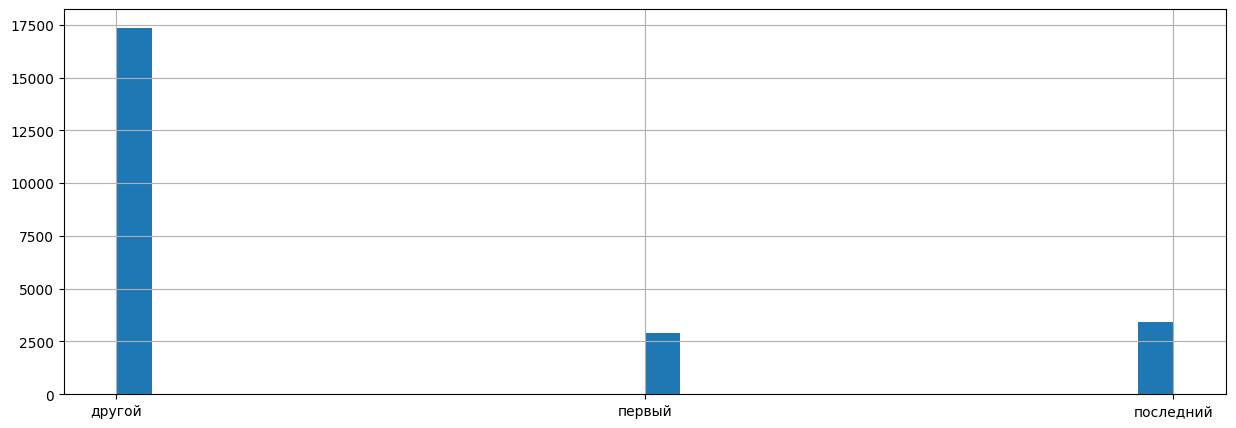

In [81]:
data['floor_category'].hist(bins=30, figsize=(15, 5));

Значений всего 3, поэтому можем также посмотреть соотношение в виде круговой диаграммы путём создания сводной таблицы

In [82]:
pie_pivot = data.pivot_table(index='floor_category', values = 'rooms', aggfunc='count')
pie_pivot.columns = ['Количество квартир']

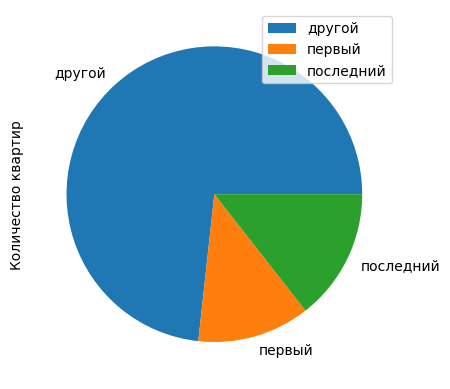

In [83]:
pie_pivot.plot(y='Количество квартир', kind='pie');

Больше всего объявлений в категории 'другой'. Квартир на первом и последнем этажах на рынке недвижимости явно меньше.

**Общее количество этажей в доме**

In [84]:
data['floors_total'].describe()

count    23699.000000
mean        10.671463
std          6.595802
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

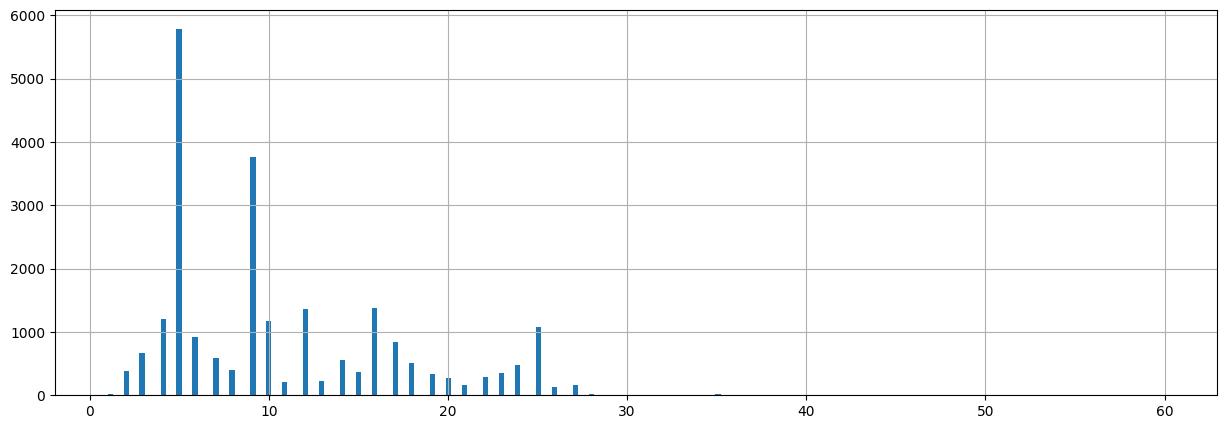

In [85]:
data['floors_total'].hist(bins=200, range=(1,60), figsize=(15, 5));

Сократим предел до 30

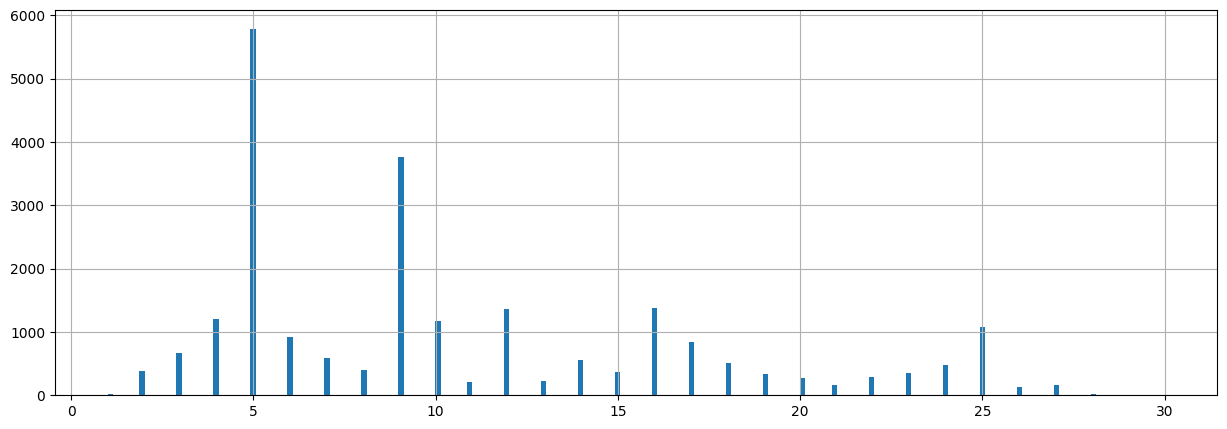

In [86]:
data['floors_total'].hist(bins=200, range=(1,30), figsize=(15, 5));

На графике четко видно, что лидируют дома этажностью в 5 и 9 этажей

**Расстояние до центра города в метрах**

In [87]:
data['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

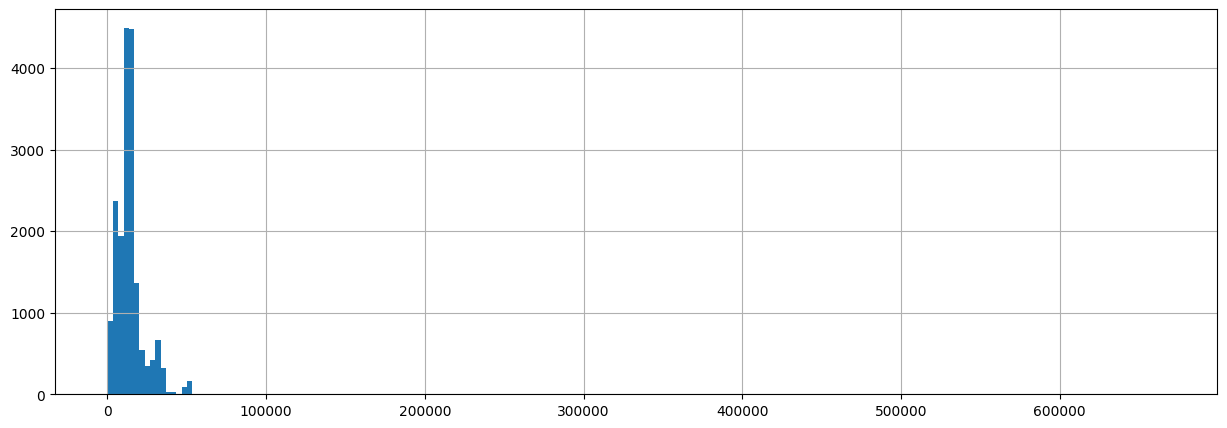

In [88]:
data['city_centers_nearest'].hist(bins=200, range=(181,665968), figsize=(15, 5));

Уменьшаем предел до 50000

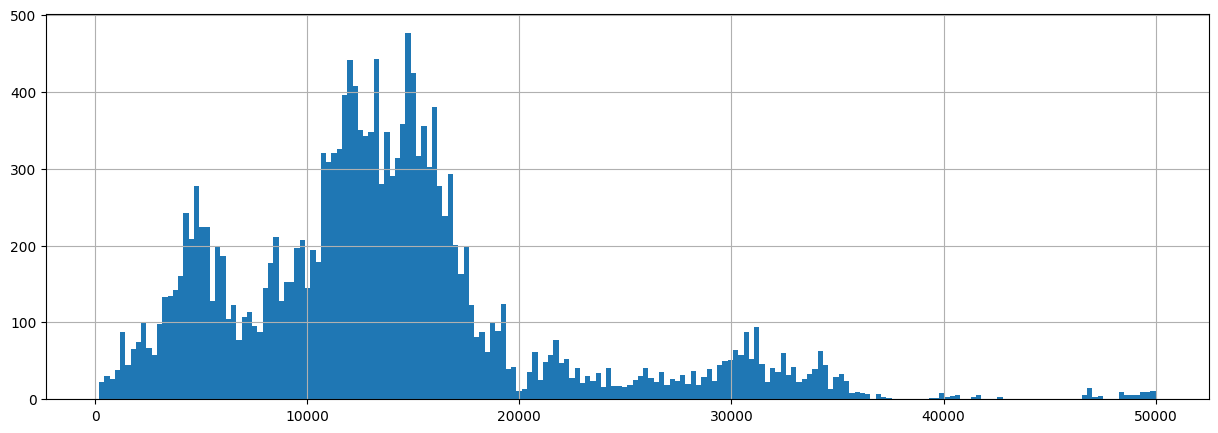

In [89]:
data['city_centers_nearest'].hist(bins=200, range=(181,50000), figsize=(15, 5));

Виднеется 2 самых больших скачка. Означает что больше всего объявлений на квартиры на расстоянии от центра в 5000 метров и в промежутке от 12000 до 15000 метров.

**Расстояние до ближайшего парка**

In [90]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

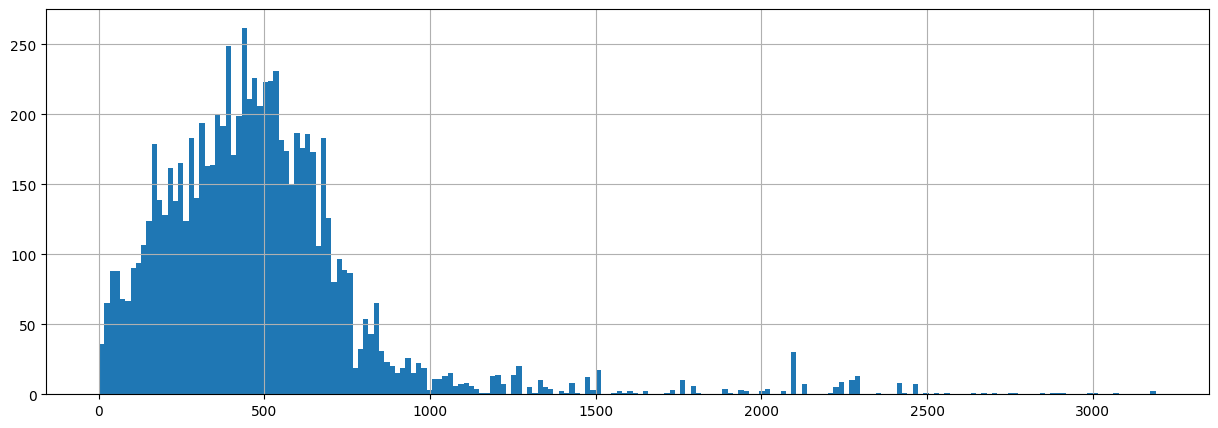

In [91]:
data['parks_nearest'].hist(bins=200, range=(1,3190), figsize=(15, 5));

Калибруем range до 1000 метров

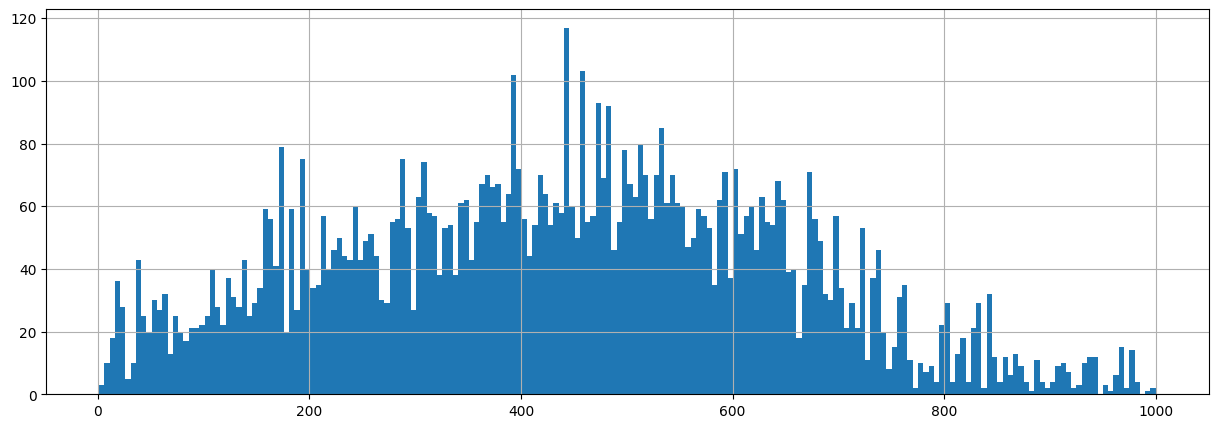

In [92]:
data['parks_nearest'].hist(bins=200, range=(1,1000), figsize=(15, 5));

Динамика достаточно плотная. Самые высокие показатели в широком промежутке 180-700 м. Влияние на количество объявлений несущественное.

**Вывод**

По самым высоким выявленным показателям мы можем составить неаиболее популярное объявление. Это квартира в пятиэтажном доме на окраине города с общей площадью 45 м2; стоимостью в районе 4 миллионов; с высотой потолка 2.5 метра; находящаяся на любом этаже, кроме первого и последнего.
Для проведения дальнейшего анализа удалим лишние аномальные значения:   
ceiling_height - Оставим значения от 2.5 до 3.2 м;    
last_price - до 15 миллионов;  
total_area - до 200 м2;    
rooms - до 7 комнат.

In [93]:
data = data.query('2.5 <= ceiling_height <= 3.2')

In [94]:
data = data.query('total_area <= 200')

In [95]:
data = data.query('rooms <= 7')

In [96]:
data = data.query('last_price <= 15000000')

In [97]:
len(data)

21926

In [98]:
len(data)/23699

0.9251867167391029

Тем самым мы избавились от аномальных значений, которые составляли 7,5% от изначального общего количества строк.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! 
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>В данном задании важно не просто определить границы для аномалий, а ещё удалить их в том датасете, с которым ты работаешь дальше. Нужно убрать аномальные значения для потолков, стоимости квартиры, площади и количества комнат. А количество отброшенных данных не должно превышать 10% от изначального объёма данных.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Понял. Все аномалии удалил в промежуточном выводе👌
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Отлично! Теперь всё верно)
</div>

#### Как быстро продавались квартиры

In [99]:
data['days_exposition'].describe()

count    19214.000000
mean       174.803789
std        213.502107
min          1.000000
25%         44.000000
50%         92.000000
75%        221.000000
max       1580.000000
Name: days_exposition, dtype: float64

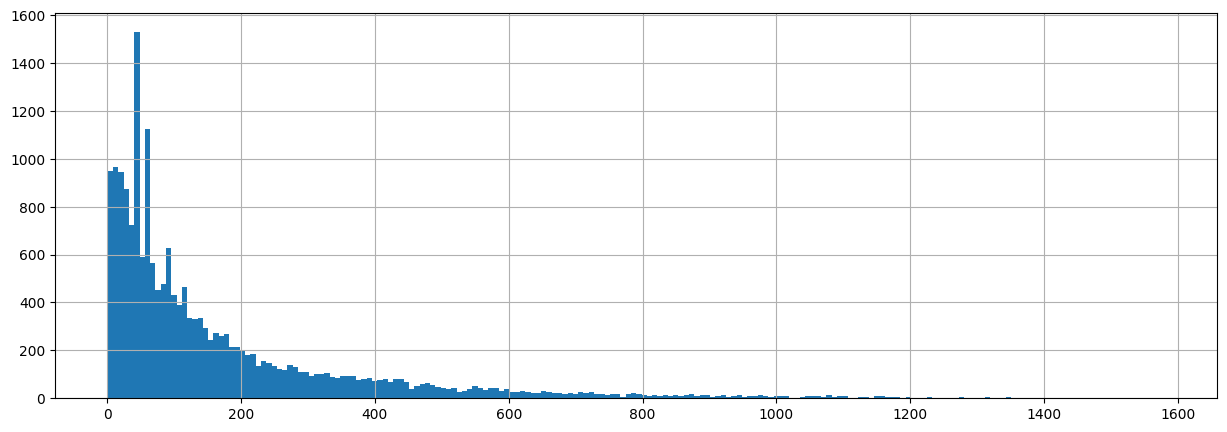

In [100]:
data['days_exposition'].hist(bins=200, range=(1,1580), figsize=(15, 5));

Наибольшую активность видим до значения 400

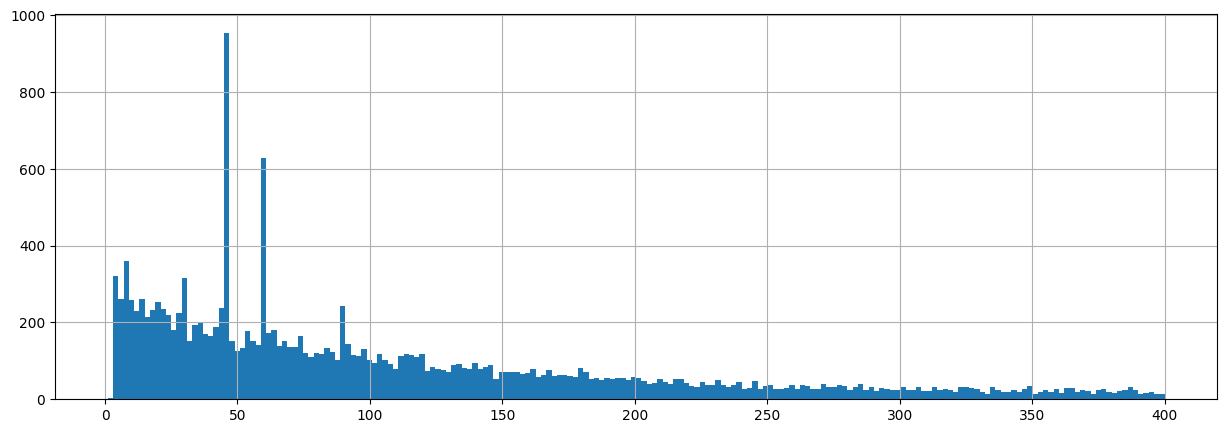

In [101]:
data['days_exposition'].hist(bins=200, range=(1,400), figsize=(15, 5));

**Вывод**

Большее количество квартир продается в течение 3-4 месяцев со дня размещения объявлений.
Средним показателем является 174 дня, но правильнее опираться на медиану, т.к. в массиве значений большое количество выбросов, что точно демонстрирует первая гистограмма.
Необычно долгими являются объявления с показателем 360 дней и выше.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Ниже посторил график на 100 дней. Вижу отчетливые пики на показателях 5, 30, 45, 60. Но мне сложно это объяснить. Как версия - возможно на пятый день действительно продавалось много квартир, так сказать "с молотка". А потом всплески на 30, 45 и 60 - возможно пользователь отмечал, что квартира продана, но не удалял объявление. А потом на каждый 15-ый день система, где размещались объявления, сама удаляла проданные лоты. 
</div>

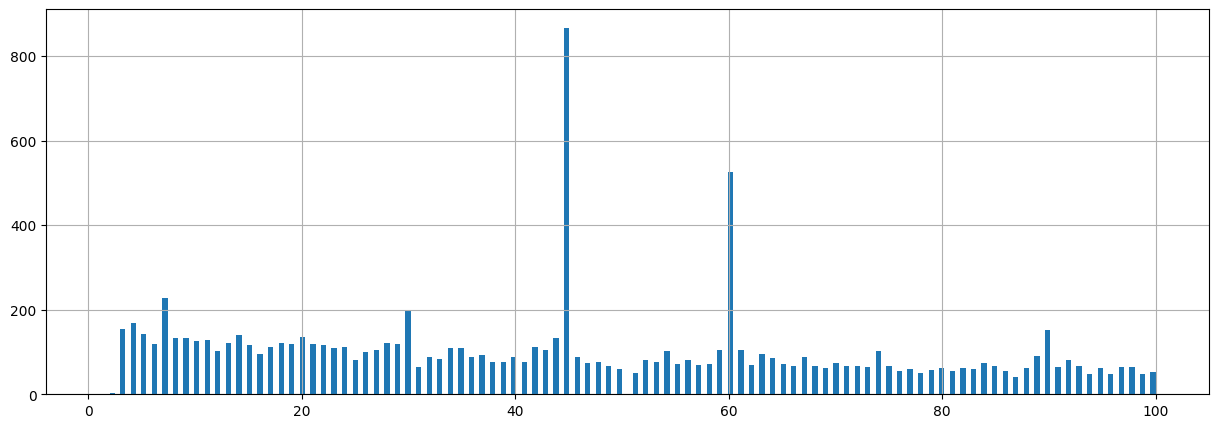

In [102]:
data['days_exposition'].hist(bins=200, range=(1,100), figsize=(15, 5));

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Верно! Это особенность функционирования системы размещения объявлений) Убедиться в этом можно по ссылке ниже

	https://yandex.ru/support/realty/owner/home/add-ads-housing.html
</div>

#### Факторы, которые больше всего влияют на общую (полную) стоимость объекта

Для начала сделаем срез по нужным столбцам и посмотрим общую корреляцию по выбранным параметрам.

In [103]:
factors = data.loc[:,['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_category']]
#factors.head()

In [104]:
factors.corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.739036,0.624870,0.555331,0.476875
total_area,0.739036,1.000000,0.920404,0.534766,0.799845
living_area,0.624870,0.920404,1.000000,0.281050,0.878040
kitchen_area,0.555331,0.534766,0.281050,1.000000,0.176333
rooms,0.476875,0.799845,0.878040,0.176333,1.000000


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Рассчитывать корреляцию Пирсона для дня недели, месяца и года продажи не эффективно, так как цена в данном случае зависит от них не линейно, ведь это категориальные переменные. Чтобы изучить зависимость для этих параметров лучше построить bar plot или гистограмму рассчитав среднее значение или медиану. Графики у тебя уже есть, поэтому остаётся только удалить расчет корреляции)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Согласен. Действительно, это ведь категориальные переменные. Удалил эти столобцы из таблицы.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

Предварительно видно, что наибольшая взаимосвязь стоимости квартиры с такими показателями как total_area, living_area и kitchen_area.
Теперь проверим все по отдельности. Возможно выбросы могли сильно повлиять на отклонение коэффициента Пирсона.
Составим отдельные графики для показателей площадей. А для показателей с наименьшим количеством значений('rooms', 'floor_category', 'weekday_exposition', 'month_exposition', 'year_exposition') создадим сводные таблицы с медианой стоимостью и построим графики.

**Зависимость от общей площади**

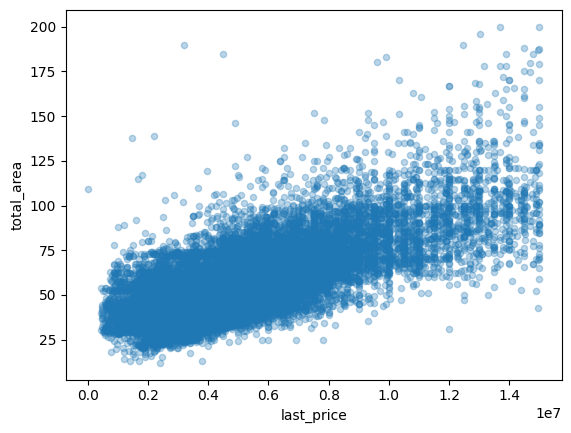

In [105]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3);

Как и в рассчетах корреляции, взаимосвязь с общей площадью действительно наблюдается. 

**Зависимость от жилой площади**

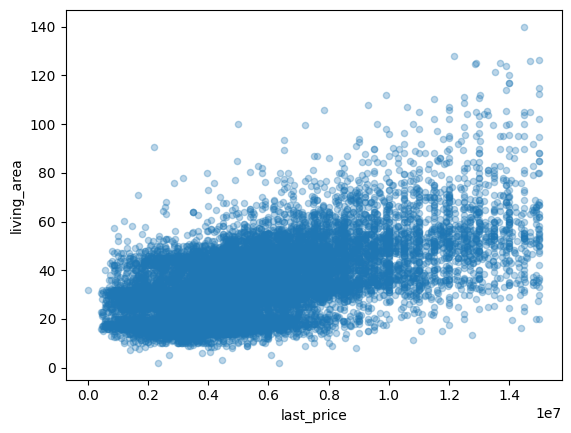

In [106]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3);

Такая же взаимосвязь видна и с показателем жилой площади, что логично, т.к. между показателями общей и жилой площадью прямая зависимость(0.92)

**Зависимость от площади кухни**

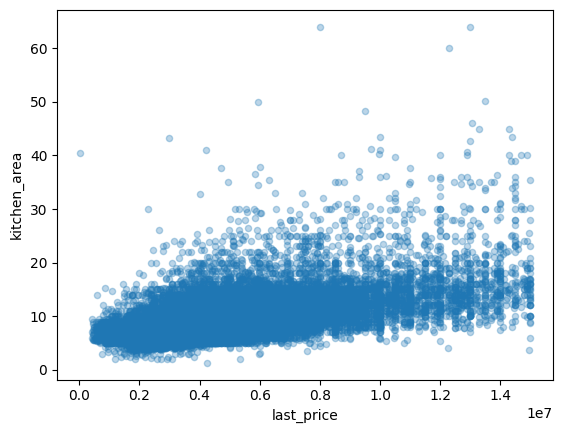

In [107]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3);

Здесь разброс больше, но всё таки примерно ситуация схожая, т.к. коэффициент корреляции общей площади к кухонной равен 0.53

**Зависимость от количества комнат**

In [108]:
rooms_corr = data.pivot_table(index='rooms', values='last_price', aggfunc='median')

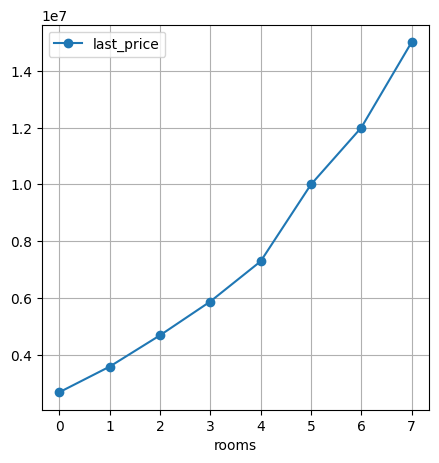

In [109]:
rooms_corr.plot(style='o-', grid=True, figsize=(5,5));

Взамосвязь с количеством комнатам также прослеживается, что подтверждает значения коэффициента 0.47

**Зависимость от этажа, на котором расположена квартира (первый, последний, другой)**

In [110]:
floor_corr = data.pivot_table(index='floor_category', values='last_price', aggfunc='median')

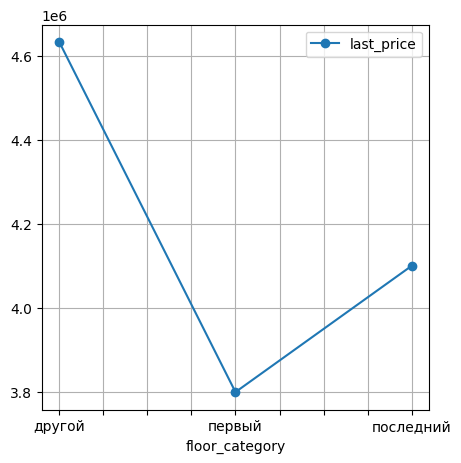

In [111]:
floor_corr.plot(style='o-', grid=True, figsize=(5,5));

Данный график четко показывает, стоимость квартир, расположенных на первом этаже явно ниже, чем на остальных этажах.

**Зависимость от даты размещения (день недели, месяц, год)**

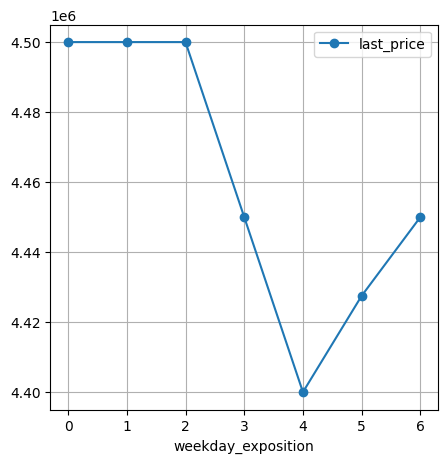

In [112]:
weekday_corr = data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median')
weekday_corr.plot(style='o-', grid=True, figsize=(5,5));

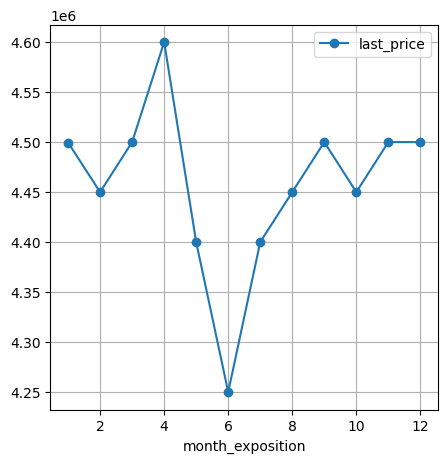

In [113]:
month_corr = data.pivot_table(index='month_exposition', values='last_price', aggfunc='median')
month_corr.plot(style='o-', grid=True, figsize=(5,5));

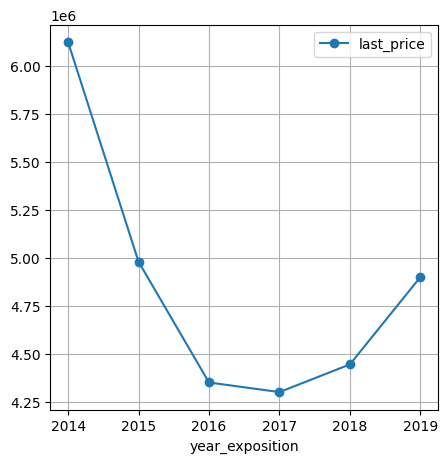

In [114]:
year_corr = data.pivot_table(index='year_exposition', values='last_price', aggfunc='median')
year_corr.plot(style='o-', grid=True, figsize=(5,5));

Взаимосвязи с временем размещения объявления практически нет и быть не может, т.к. это категориальные значения.Но видны определенные пики. В понедельник, в апреле и в 2014 году выкладывались объявления с более высокой стоимостью объекта недвижимости.

**Вывод**

Расчеты коэффициентов Пирсона полностью подтвердилась. Стоимость квартир прямопропорционально возрастает с увеличением общей площади и количества комнат.
Также выявили интересный факт, что в среднем квартиры на первом этаже дешевле квартир на остальных этажах.
Дата размещения объявления не оказывает особого на стоимость объекта недвижимости.

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [115]:
top10_meter_price = data.pivot_table(index='locality_name', values='meter_price', aggfunc=['count', 'mean'])
top10_meter_price.columns = ['количество объявлений', 'средняя цена за 1м2']
top10_meter_price.round(2).sort_values(by='количество объявлений', ascending=False).head(10)

,количество объявлений,средняя цена за 1м2
locality_name,,
санкт-петербург,14079,107010.11
мурино,590,86087.59
кудрово,471,95324.85
шушары,439,78655.73
всеволожск,393,67153.93
пушкин,339,101162.82
колпино,334,75365.85
парголово,325,90363.68
гатчина,305,68764.43


Самые высокие цены за 1 м2 среди населенных пунктов с самым большим количеством объявлений это Санкт-Петербург и Пушкин.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10 по средней цене, так будет более наглядно)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Да👍 Дейчтвительно отличный вариант для просмотра динамики двух показателей 
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>График построен верно! Не забывай добавлять подписиь графика, его осей и сортировку
</div>

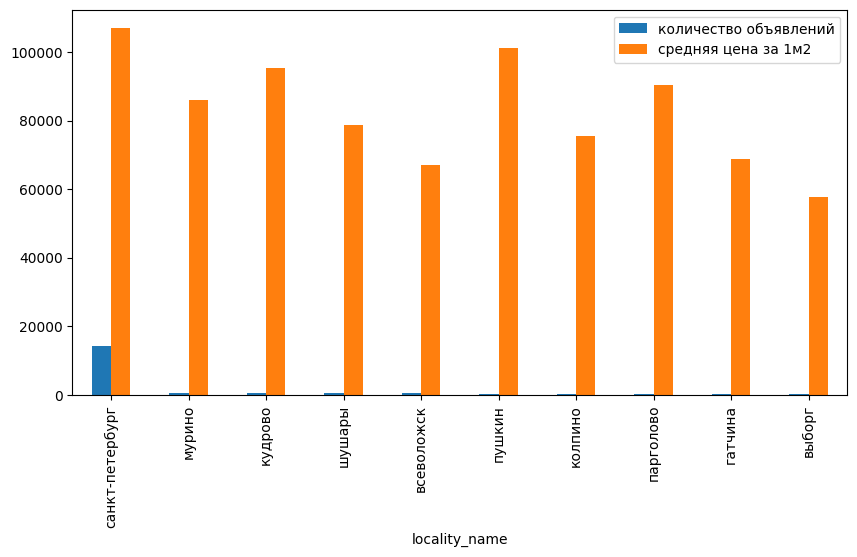

In [116]:
(top10_meter_price.round(2).sort_values(by='количество объявлений', ascending=False).head(10)).plot(kind='bar', figsize=(10,5));

####  Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра.

In [117]:
spb_price_center=data[data['locality_name'] == 'санкт-петербург']


In [118]:
spb_price_center_pivot = spb_price_center.pivot_table(index='km_till_center', values='last_price')
spb_price_center_pivot.columns = ['средняя цена квартиры']
spb_price_center_pivot['средняя цена квартиры'] = spb_price_center_pivot['средняя цена квартиры'].round(2)
spb_price_center_pivot.head(10)

,средняя цена квартиры
km_till_center,
0.0,9000000.00
1.0,8827122.44
2.0,8809011.63
3.0,8162588.73
4.0,8297715.94
5.0,8432624.02
6.0,7778460.64
7.0,7230514.53
8.0,7116219.86


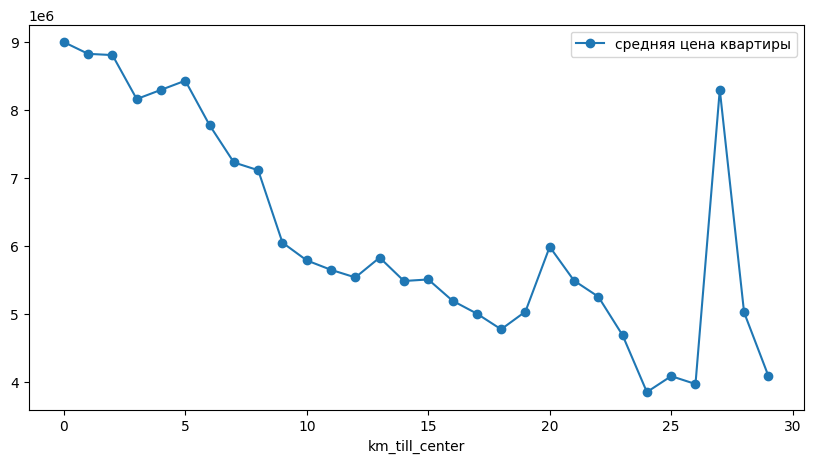

In [119]:
spb_price_center_pivot.plot(style='o-', figsize=(10,5));

**Вывод**

На основании сводной таблицы и графика видно, что с удалением от центра стоимость квартир понижается, если не считать всплеска цены в районе 5 километров.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Отличный анализ 👍
</div>

### Напишите общий вывод

В ходе проведения исследования были проделаны следующие этапы:

1. **Проверка общей информации о данных таблицы.** 
Данная проверка и выведенные гистограммы показали большое количество пропущенных значений в столбцах и явные выбросы аномальных значений.


2. **Предобработка данных. Ниже показаны решения и действия, выполненые на данном этапе:**
* Во всех столбцах проверены уникальные значения;
* В столбце last_price поменяли тип данных на int;
* В столбце total_area округлили значения до десятичных;
* Cтолбец first_day_exposition был изменен на временной тип данных;
* В ceiling_height заполнили пропуски медианным значением,выявили аномальные значения, часть аномальных значений исправили, перенеся запятую;
* В столбце floors_total заполнили пропуски значениями этажей, на которых находится объект;
* living_area - заполнили пропуски, посчитав и испольуя средне-процентное отношение жилой площади к общей площади. Округлили значения до десятичных;
* is_apartment - заполнили пропуски значениями False;
* Изменили название столбца cityCenters_nearest;
* kitchen_area - заполнили пропуски, посчитав и испольуя средне-процентное отношение кухонной площади к общей площади. Округлили значения до десятичных;
* balcony - Заполнили пропуски нулевыми значениями и поменяли тип данных на int;
* locality_name - пропуски были заполнены значением other. Имеющиеся данные были отредактированы;
* Пропуски в столбцах parks_around3000, ponds_around3000 были заполнены нулевыми значениями. Тип данных изменен на int.

3. **Были добавлены дополнительные столбцы для проведения последедующего анализа:**
* meter_price - цена одного квадратного метра;
* weekday_exposition - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* month_exposition - месяц публикации объявления;
* year_exposition - год публикации объявления;
* floor_category - тип этажа квартиры (значения — «первый», «последний», «другой»);
* km_till_center - расстояние до центра города в километрах;

4. **Сделан исследовательский анализ данных.**  
* **Проанализированы основные показатели.**  
По самым высоким выявленным показателям можно составить наиболее популярное объявление - это квартира в пятиэтажном доме на окраине города с общей площадью 45 м2; стоимостью в районе 4 миллионов; с высотой потолка 2.5 метра; находящаяся на любом этаже, кроме первого и последнего. Также были удалено 7,5% данных с аномальными значениями для более качественного дальнейшего исследования.
* **Изучено, как быстро продавались квартиры.**  
Большее количество квартир продается в течение 3-4 месяцев со дня размещения объявлений.
Средним показателем является 174 дня. Необычно долгими являются объявления с показателем 360 дней и выше.
* **Определены факторы, которые больше всего влияют на общую стоимость объекта.**  
Стоимость квартир прямопропорционально возрастает с увеличением общей площади и количества комнат. Также выявили интересный факт, что в среднем квартиры на первом этаже дешевле квартир на остальных этажах. Дата размещения объявления не оказывает особого влияния на стоимость объекта недвижимости
* **Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**  
Самые высокие цены за 1 м2 среди населенных пунктов с самым большим количеством объявлений это Санкт-Петербург и Пушкин
* **Вычислена средняя стоимость квартир в Санкт-Петербурге на разном удалении от центра.**  
Был сделан вывод, что с удалением от центра стоимость квартир понижается, если не считать всплеска цены в районе 5 километров.

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Необходимо поправить:
<br>- выполнить задание 1.3
<br>- отбросить аномальные значения 
<br>- удалить расчет корреляции для времени продажи

<br>После всех внесённых правок не забудь поправить выводы там, где это необходимо
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Все замечания устранены. Некритичные замечания также применены в соответствующих разделах. Благодарю за проверку и полезные советы👍
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Все правки выполнены. Молодец!
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.